### Simulation study for Bayesian logistic regression example

In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))  
sys.path.append(project_root)

import torch
import numpy as np
import matplotlib.pyplot as plt
import pickle
from toy_example.algorithms import mypipla, mypgd, proximal_map_laplace_approx, pipgla
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

os.chdir(project_root)

#### Obtain synthetic dataset for Laplace prior case

The algorithm is tested on a toy example consisting of a Bayesian logistic regression task with Laplace prior for the covariates.

In [2]:
# Data and design matrix
from scipy.stats import laplace, norm
theta00 = -3
x_unknown = laplace.rvs(loc = theta00, size = (50, 1))
data_experiment = norm.rvs(loc = x_unknown, scale = 1)
labels = data_experiment

In [3]:
np.mean(x_unknown)

-3.1091536865857643

##### Moreau-Yosida PGD algorithm approximately

100%|██████████| 5000/5000 [00:55<00:00, 89.75it/s] 


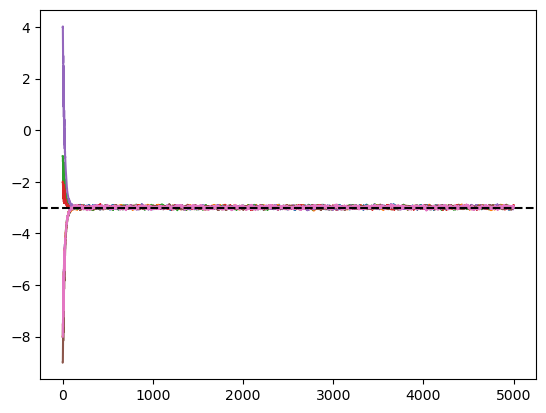

In [12]:
n_particles = 50
n_iterations = 5000

fig = plt.figure()

theta_ips = []
X_ips = []
for _ in range(7):
    theta0 = np.random.randint(-15, 10)
    X0 = np.random.normal(loc = theta0, size=(50, n_particles))
    thetas_approx, XX_approx = mypgd(th = np.array([[theta0]]), X = X0, N = n_particles, data = labels, K = n_iterations, gamma = 0.25, h = 0.05)
    theta_ips.append(thetas_approx)
    X_ips.append(XX_approx)
    plt.plot(thetas_approx)

plt.axhline(y=theta00, color='black', linestyle='dashed')
plt.show()
#fig.savefig('prox_pgd_approx.pdf', format='pdf')

In [ ]:
list_map_estimate = []
list_rmse = []
list_rmse_2 = []

for i in range(7):
    list_map_estimate.append(np.mean(theta_ips[i][-2000:]))
    list_rmse.append(np.abs(np.mean(theta_ips[i][-2000:])-np.mean(x_unknown))/np.abs(np.mean(x_unknown)))
    list_rmse_2.append(np.abs(np.mean(theta_ips[i][-2000:])-theta00)/np.abs(theta00))

In [16]:
print("mean RME", np.mean(list_rmse))
print("std RME", np.std(list_rmse))
print("mean RME", np.mean(list_rmse_2))
print("std RME", np.std(list_rmse_2))

mean RME 0.03966776782930143
std RME 0.00042058024710965917
mean RME 0.004726499999778804
std RME 0.0004358828752687159


##### Moreau-Yosida PIPLA approximately

100%|██████████| 5000/5000 [00:56<00:00, 88.50it/s] 


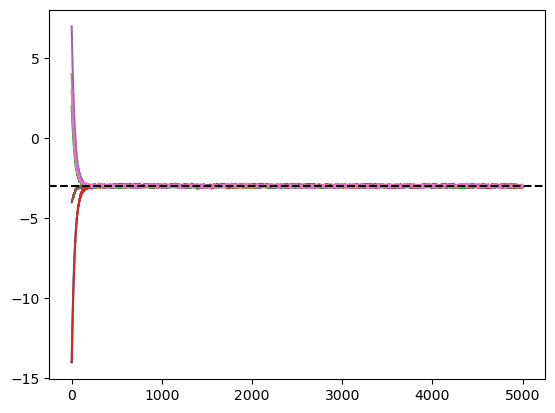

In [19]:
n_particles = 50
n_iterations = 5000

fig = plt.figure()

theta_ips = []
X_ips = []
for _ in range(7):
    theta0 = np.random.randint(-15, 10)
    X0 = np.random.normal(loc = theta0, size=(50, n_particles))
    thetas_approx, XX_approx = mypipla(proximal_map = proximal_map_laplace_approx, th = np.array([[theta0]]), X = X0, N = n_particles, data = labels, K = n_iterations, gamma = 0.25, h = 0.03)
    theta_ips.append(thetas_approx)
    X_ips.append(XX_approx)
    plt.plot(thetas_approx)

plt.axhline(y=theta00, color='black', linestyle='dashed')
plt.show()

In [ ]:
list_map_estimate = []
list_rmse = []
list_rmse_2 = []

for i in range(7):
    plt.hist(X_ips[i][0, -1500:], bins=50, alpha = 0.5, density=True)
    list_map_estimate.append(np.mean(theta_ips[i][-2000:]))
    list_rmse.append(np.abs(np.mean(theta_ips[i][-2000:])-np.mean(x_unknown))/np.abs(np.mean(x_unknown)))
    list_rmse_2.append(np.abs(np.mean(theta_ips[i][-2000:])-theta00)/np.abs(theta00))

In [24]:
print("mean RME", np.mean(list_rmse))
print("std RME", np.std(list_rmse))
print("mean RME", np.mean(list_rmse_2))
print("std RME", np.std(list_rmse_2))

mean RME 0.03867783597828126
std RME 0.0011940017623015271
mean RME 0.0037005499117561363
std RME 0.0012374449936832304


#### PIPGLA

100%|██████████| 5000/5000 [00:54<00:00, 91.69it/s] 


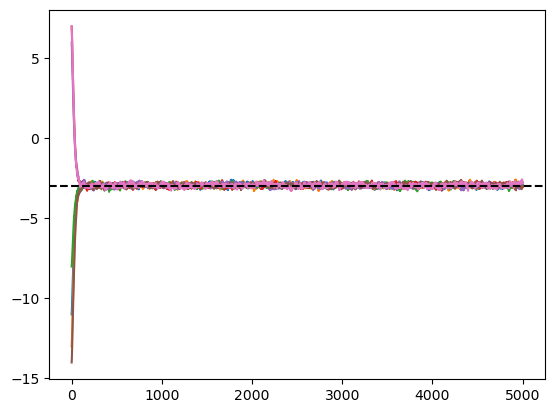

In [43]:
n_particles = 50
n_iterations = 5000

fig = plt.figure()

theta_ips = []
X_ips = []
for _ in range(7):
    theta0 = np.random.randint(-15, 10)
    X0 = np.random.normal(loc = theta0, size=(50, n_particles))
    thetas_approx, XX_approx = pipgla(proximal_map = proximal_map_laplace_approx, th = np.array([[theta0]]), X = X0, N = n_particles, data = labels, K = n_iterations, gamma = 0.005, h = 0.05)
    theta_ips.append(thetas_approx)
    X_ips.append(XX_approx)
    plt.plot(thetas_approx)

plt.axhline(y=theta00, color='black', linestyle='dashed')
plt.show()

In [ ]:
list_map_estimate = []
list_rmse = []
list_rmse_2 = []

for i in range(7):
    plt.hist(X_ips[i][0, -1500:], bins=50, alpha = 0.5, density=True)
    list_map_estimate.append(np.mean(theta_ips[i][-2000:]))
    list_rmse.append(np.abs(np.mean(theta_ips[i][-2000:])-np.mean(x_unknown))/np.abs(np.mean(x_unknown)))
    list_rmse_2.append(np.abs(np.mean(theta_ips[i][-2000:])-theta00)/np.abs(theta00))

In [46]:
print("mean RME", np.mean(list_rmse))
print("std RME", np.std(list_rmse))
print("mean RME", np.mean(list_rmse_2))
print("std RME", np.std(list_rmse_2))

mean RME 0.05709396270111923
std RME 0.004313221467778468
mean RME 0.022786739342736888
std RME 0.004470156142534763
